In [2]:
#HEATMAP!

In [3]:
 #load in seaborn, matplotlib, and numpy!
 import seaborn as sns
 from matplotlib import pyplot as plt
 import numpy as np

In [4]:
# Our Example Dataset
cars = sns.load_dataset('mpg')

In [5]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
#grouping the dataset to work with the scatterplot
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [7]:
#preparation
origin_cyl =(cars
    .groupby('origin')
    .cylinders
    .value_counts()
    .unstack()
    .fillna(0) #to avoid blank squares
    )

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

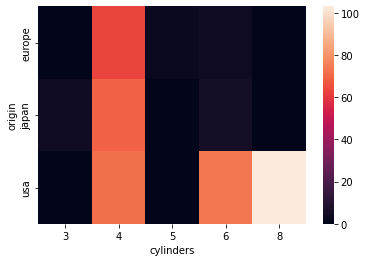

In [8]:
#making our first heatmap!
sns.heatmap(origin_cyl)

<AxesSubplot:>

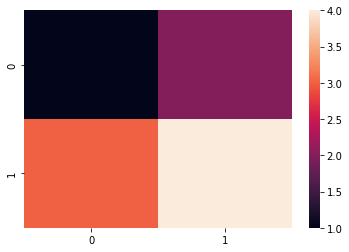

In [9]:
#heatmaps can also take numpy arrays
test_array = np.array([[1,2],[3,4]])

sns.heatmap(test_array)

<AxesSubplot:xlabel='origin', ylabel='cylinders'>

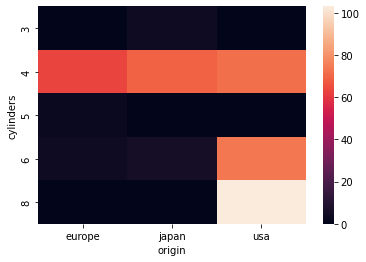

In [24]:
#Can transpose heatmap easily with T
sns.heatmap(origin_cyl.T)

In [20]:
#Correlation matricies can also be put into heat maps
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<AxesSubplot:>

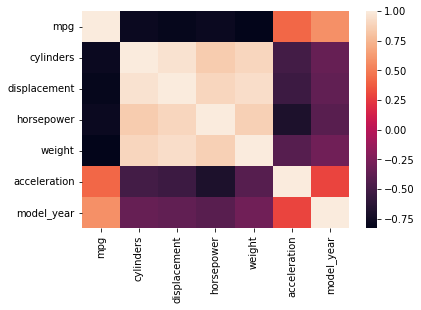

In [21]:
sns.heatmap(cars.corr())

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

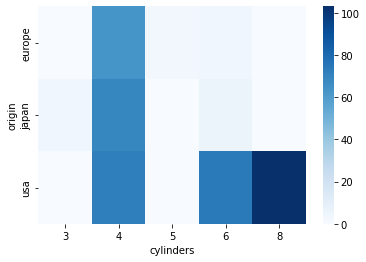

In [30]:
#cmap controls the color palette, there are 170 to choose from
sns.heatmap(origin_cyl, cmap="Blues")

<AxesSubplot:>

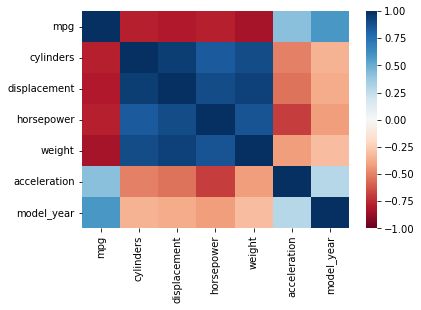

In [34]:
#center controls where the "center" of a diverging color scheme is
#vmin and vmax control minimum and maximum scale values
sns.heatmap(cars.corr(), cmap='RdBu',center=0,vmin=-1,vmax=1)

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

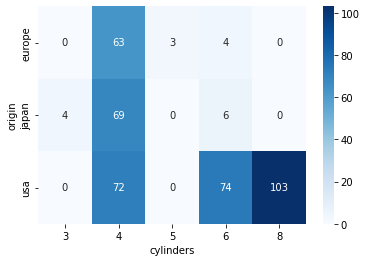

In [36]:
#annot adds annotations to each box
#fmt controls the number of floating decimals
sns.heatmap(origin_cyl, cmap="Blues",annot=True,fmt=".0f")

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

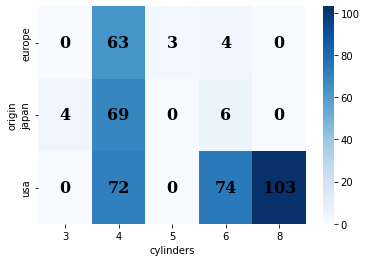

In [10]:
#there are depths you can go into changing these annotations
sns.heatmap(origin_cyl, cmap="Blues",annot=True,fmt=".0f",
        annot_kws={
            'fontsize':16,
            'fontweight':'bold',
            'fontfamily': 'serif',
            'color': 'black'
        })

<AxesSubplot:>

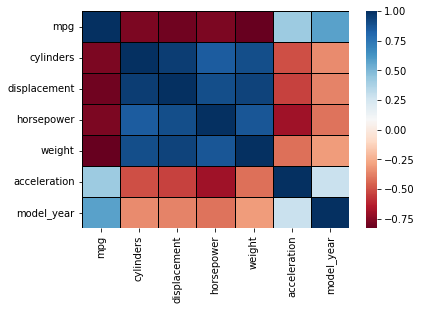

In [40]:
#linewidth is border size and linecolor is border color
sns.heatmap(cars.corr(), cmap='RdBu', linewidth=1, linecolor='black')

In [41]:
#you can add your own labels!
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
            'Weight', 'Acceleration', 'Model Year']

<AxesSubplot:>

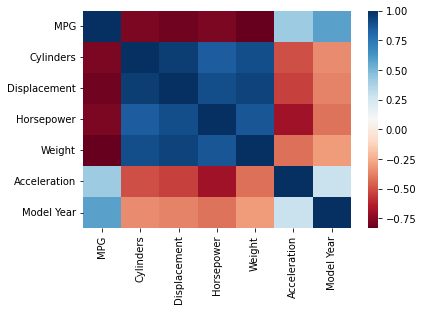

In [42]:
#xticklabels and yticklabels control label customization
sns.heatmap(cars.corr(),cmap='RdBu',
    xticklabels=labels,yticklabels=labels)

<AxesSubplot:>

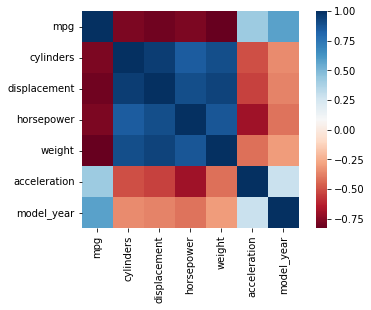

In [43]:
#Square makes all the boxes into perfect squares
sns.heatmap(cars.corr(),cmap='RdBu',
            square=True)